In [28]:
import matplotlib.pyplot as plt
import numpy as np

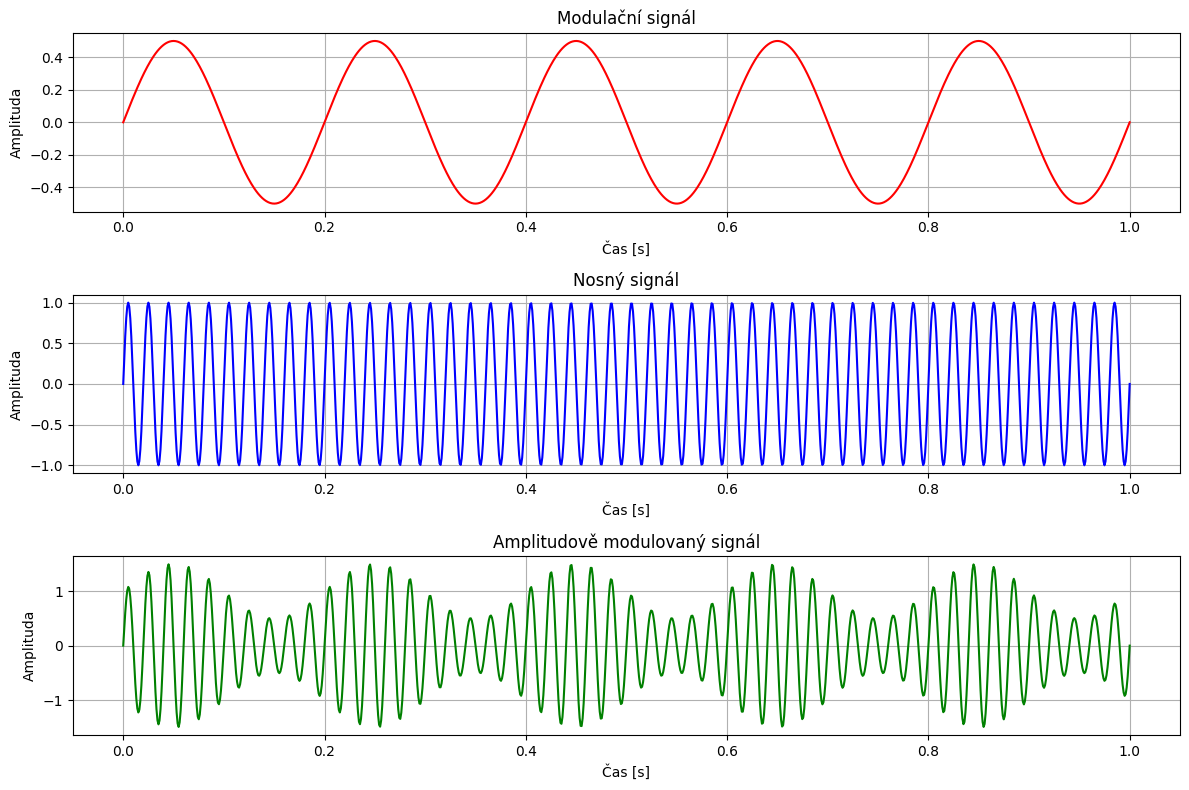

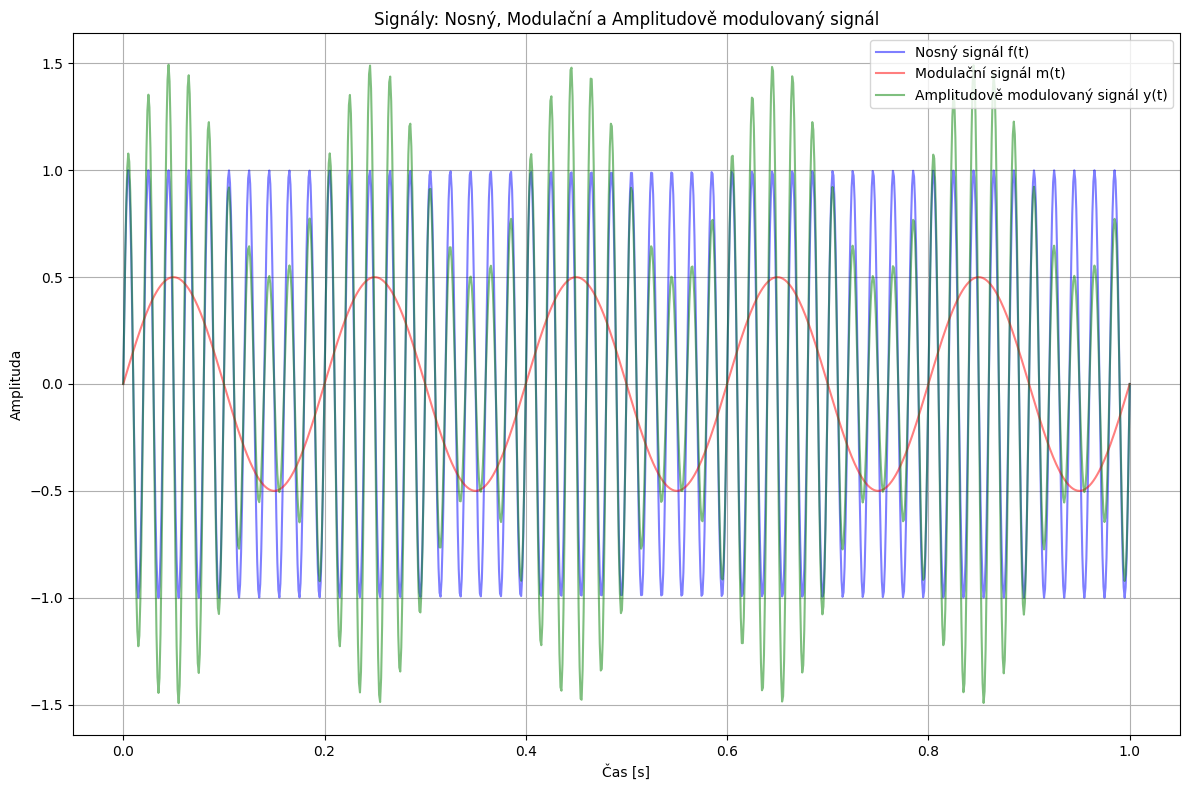

In [27]:
A0 = 1  # Amplituda nosného signálu
M = 0.5  # Amplituda modulačního signálu
f_nosny = 50  # Frekvence nosného signálu
f_modulacni = 5  # Frekvence modulačního signálu
t = np.linspace(0, 1, 1000)  # Časový vektor (1 sekunda, 1000 bodů)

# Nosný signál f(t) = A0 * sin(ωt)
nosny_signal = A0 * np.sin(2 * np.pi * f_nosny * t)

# Modulační signál m(t) = M * sin(φt)
modulacni_signal = M * np.sin(2 * np.pi * f_modulacni * t)

# Amplitudová modulace y(t) = (A0 + M * sin(φt)) * sin(ωt)
modulovany_signal = (A0 + modulacni_signal) * np.sin(2 * np.pi * f_nosny * t)

# Vykreslení signálů
plt.figure(figsize=(12, 8))

# Vykreslení modulačního signálu
plt.subplot(3, 1, 1)
plt.plot(t, modulacni_signal, label="Modulační signál (m(t))", color="r")
plt.title("Modulační signál")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid(True)

# Vykreslení nosného signálu
plt.subplot(3, 1, 2)
plt.plot(t, nosny_signal, label="Nosný signál (f(t))", color="b")
plt.title("Nosný signál")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid(True)

# Vykreslení modulovaného signálu
plt.subplot(3, 1, 3)
plt.plot(t, modulovany_signal, label="Amplitudově modulovaný signál (y(t))", color="g")
plt.title("Amplitudově modulovaný signál")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid(True)
plt.tight_layout()

# Vykreslení všech signálů
plt.figure(figsize=(12, 8))
plt.plot(t, nosny_signal, label="Nosný signál f(t)", color="b", alpha=0.5)
plt.plot(t, modulacni_signal, label="Modulační signál m(t)", color="r", alpha=0.5)
plt.plot(
    t,
    modulovany_signal,
    label="Amplitudově modulovaný signál y(t)",
    color="g",
    alpha=0.5,
)
plt.title("Signály: Nosný, Modulační a Amplitudově modulovaný signál")
plt.xlabel("Čas [s]")
plt.ylabel("Amplituda")
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()